Importando Bibliotecas

In [2]:
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#pip install pandas-datareader
import pandas_datareader.data as web
#pip install seaborn
import seaborn as sns
# pip install statistics
import statistics  as sts

#pip install yfinance
import yfinance as yf
yf.pdr_override()

from tratar_dados import tratar_dados

Obtendo dados

In [3]:
# tickers = ["GOOG", 
#            "AAPL", 
#            "MSFT", 
#            "AMZN"]

tickers = ["VALE3.SA", 
           "ITSA4.SA",  
           "WEGE3.SA",
           "PETR4.SA",
           "BBAS3.SA"]

In [4]:
carteria = web.get_data_yahoo(tickers, period="5y")["Adj Close"]
carteria

[*********************100%%**********************]  5 of 5 completed


,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2018-09-10,20.883675,6.482803,6.859864,36.663403,9.113594
2018-09-11,19.938028,6.215197,6.589172,36.229393,8.903815
2018-09-12,20.028902,6.255337,6.749450,36.821850,8.763968
2018-09-13,19.760977,6.295478,6.663969,37.049187,8.735997
2018-09-14,19.920286,6.442662,6.692463,38.027431,8.950437
...,...,...,...,...,...
2023-09-01,47.419998,9.340000,32.630001,68.889999,35.950001
2023-09-04,47.270000,9.240000,32.290001,69.400002,36.130001
2023-09-05,47.099998,9.120000,33.369999,69.099998,35.910000


Tratando dados

In [5]:
tratar_dados(carteria)

Gerando saldo da carteira

In [6]:
carteria["saldo"] = carteria.sum(axis=1)
carteria

,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2018-09-10,20.883675,6.482803,6.859864,36.663403,9.113594,80.003338
2018-09-11,19.938028,6.215197,6.589172,36.229393,8.903815,77.875606
2018-09-12,20.028902,6.255337,6.749450,36.821850,8.763968,78.619506
2018-09-13,19.760977,6.295478,6.663969,37.049187,8.735997,78.505608
2018-09-14,19.920286,6.442662,6.692463,38.027431,8.950437,80.033279
...,...,...,...,...,...,...
2023-09-01,47.419998,9.340000,32.630001,68.889999,35.950001,194.230000
2023-09-04,47.270000,9.240000,32.290001,69.400002,36.130001,194.330004
2023-09-05,47.099998,9.120000,33.369999,69.099998,35.910000,194.599996


Normalizando dados

In [7]:
carteria_normalizada = ((carteria / carteria.iloc[0])*100)
carteria_normalizada

,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2018-09-10,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2018-09-11,95.471840,95.872052,96.053983,98.816232,97.698177,97.340445
2018-09-12,95.906982,96.491231,98.390434,100.432167,96.163681,98.270282
2018-09-13,94.624041,97.110432,97.144328,101.052232,95.856773,98.127915
2018-09-14,95.386883,99.380799,97.559713,103.720410,98.209735,100.037425
...,...,...,...,...,...,...
2023-09-01,227.067310,144.073476,475.665439,187.898543,394.465680,242.777369
2023-09-04,226.349056,142.530928,470.709070,189.289582,396.440755,242.902369
2023-09-05,225.535014,140.679879,486.452794,188.471319,394.026765,243.239844


Movendo as datas dos indicices para uma coluna

In [8]:
carteria_normalizada.reset_index(inplace=True)
carteria_normalizada

,Date,BBAS3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA,saldo
0,2018-09-10,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2018-09-11,95.471840,95.872052,96.053983,98.816232,97.698177,97.340445
2,2018-09-12,95.906982,96.491231,98.390434,100.432167,96.163681,98.270282
3,2018-09-13,94.624041,97.110432,97.144328,101.052232,95.856773,98.127915
4,2018-09-14,95.386883,99.380799,97.559713,103.720410,98.209735,100.037425
...,...,...,...,...,...,...,...
1235,2023-09-01,227.067310,144.073476,475.665439,187.898543,394.465680,242.777369
1236,2023-09-04,226.349056,142.530928,470.709070,189.289582,396.440755,242.902369
1237,2023-09-05,225.535014,140.679879,486.452794,188.471319,394.026765,243.239844
1238,2023-09-06,224.002718,138.983087,488.639449,185.443775,390.076615,241.052437


Visualizando dados normalizados

<Axes: >

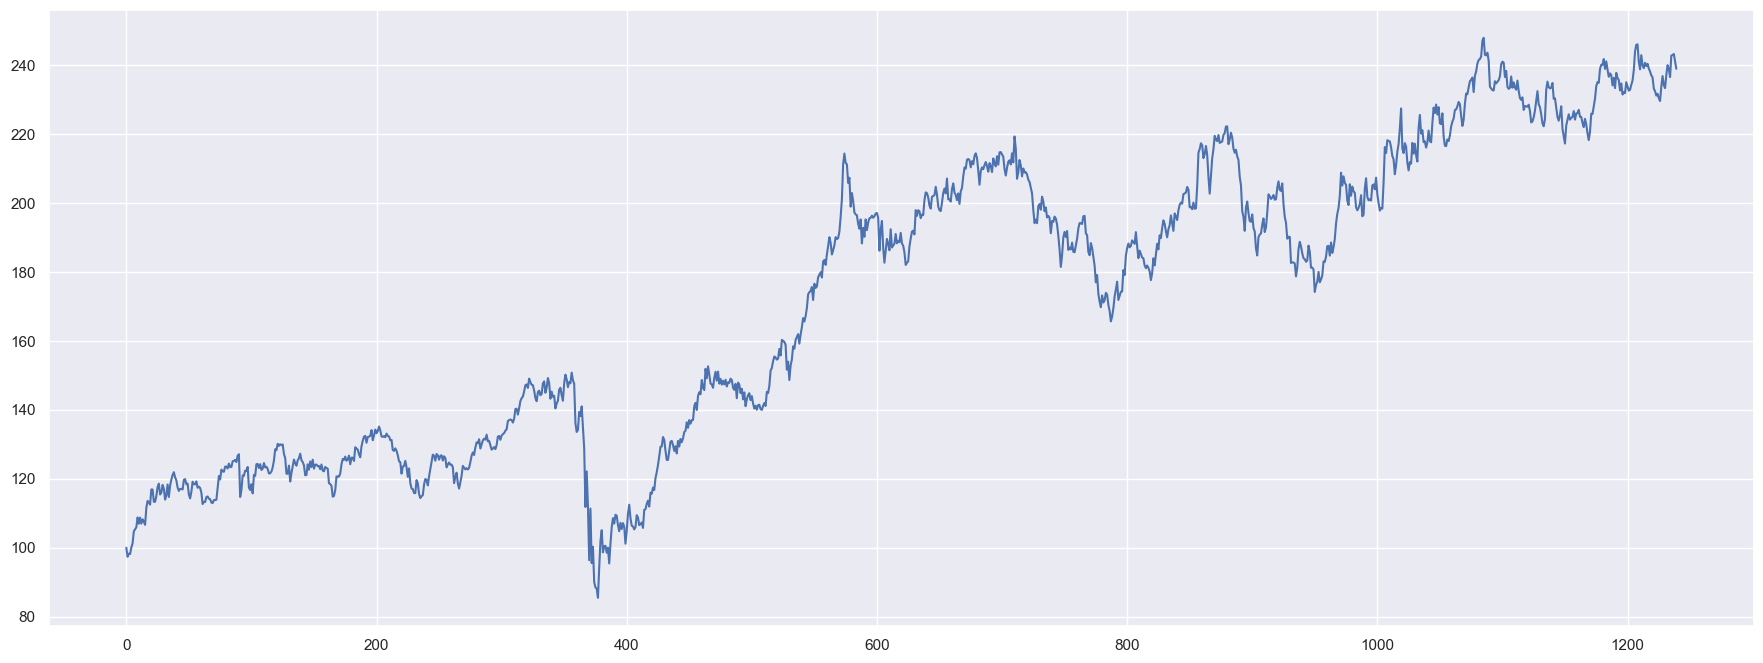

In [9]:
sns.set()
carteria_normalizada["saldo"].plot(figsize=(22,8),
                                   label="Carteria")
